In [1]:
save_name = 'ResNet34_12_Targets'

In [2]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks\ModelRuns
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [3]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [4]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [5]:
out_channels=12
net_kwargs = {'layers':34, 'drop_out_precent':.5, 'out_channels':out_channels} #18, 34, 50, 101, 152
net = ResNet_GrayScale(**net_kwargs) 

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

          Linear-125                 [-1, 1000]         513,000
          ResNet-126                 [-1, 1000]               0
          Linear-127                   [-1, 12]          12,012
ResNet_GrayScale-128                   [-1, 12]               0
Total params: 21,803,412
Trainable params: 21,803,412
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.39
Forward/backward pass size (MB): 196.51
Params size (MB): 83.17
Estimated Total Size (MB): 280.08
----------------------------------------------------------------


In [6]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=64, 
                                     learning_rate=1e-5, 
                                     num_epochs=2,
                                     device=device, 
                                     net=net,
                                     save_path= f'notebooks/ModelRuns/saved/{save_name}/',
                                     net_name = 'ResNet_GrayScale',
                                     net_kwargs = net_kwargs)

Number of Training Images: 105,574
Number of Validation Images: 26,174


In [7]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/2]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 533.7038         
Time of Completion: 2020-08-03 04:40:06.773412          
Training Duration: 0:18:12.968734          
Validation Duration: 0:02:29.695740

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11837,1061,0.009293,0.103676,0.017057,0.622000,0.150666
4,Edema,24484,7143,0.132005,0.452471,0.204382,0.705838,0.382390
5,Consolidation,6333,551,0.004895,0.056261,0.009006,0.586779,0.073039
7,Atelectasis,16543,218,0.002055,0.155963,0.004057,0.563263,0.180250
9,Pleural_Effusion,35880,24892,0.379487,0.547003,0.448101,0.706334,0.523012



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3008,21,0.002327,0.333333,0.004622,0.744553,0.266702
4,Edema,6015,2772,0.252037,0.546898,0.345055,0.772216,0.469198
5,Consolidation,1590,0,0.000000,0.000000,0.000000,0.634844,0.088761
7,Atelectasis,4075,0,0.000000,0.000000,0.000000,0.624023,0.213932
9,Pleural_Effusion,8854,8261,0.578044,0.619538,0.598072,0.787362,0.627498


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/2]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 489.9683         
Time of Completion: 2020-08-03 05:00:28.024978          
Training Duration: 0:17:55.485552          
Validation Duration: 0:02:24.863429

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11837,1398,0.064797,0.548641,0.115905,0.775034,0.321823
4,Edema,24484,10629,0.240034,0.552921,0.334748,0.771071,0.473668
5,Consolidation,6333,0,0.000000,0.000000,0.000000,0.647364,0.093607
7,Atelectasis,16543,17,0.000242,0.235294,0.000483,0.611932,0.208862
9,Pleural_Effusion,35880,29355,0.533528,0.652121,0.586894,0.794228,0.644976



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3008,296,0.066157,0.672297,0.12046,0.808992,0.391436
4,Edema,6015,1822,0.179052,0.591109,0.27485,0.790161,0.497324
5,Consolidation,1590,0,0.000000,0.000000,0.00000,0.663375,0.102866
7,Atelectasis,4075,0,0.000000,0.000000,0.00000,0.637620,0.222873
9,Pleural_Effusion,8854,9154,0.663768,0.642014,0.65271,0.821845,0.691991


Training Duration: 0:41:04.798678



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.232339
Hamming Loss,0.119573
Hamming Accuracy,0.880427
Combined Recall,0.235395
Combined Precision,0.290584
Combined F1,0.243292


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,5442,0,0.000000,0.000000,0.000000,0.553063,0.061638
1,Cardiomegaly,11837,1398,0.064797,0.548641,0.115905,0.775034,0.321823
2,Lung_Opacity,47882,47408,0.583706,0.589542,0.586609,0.671795,0.589074
3,Lung_Lesion,4405,0,0.000000,0.000000,0.000000,0.614860,0.061714
4,Edema,24484,10629,0.240034,0.552921,0.334748,0.771071,0.473668
5,Consolidation,6333,0,0.000000,0.000000,0.000000,0.647364,0.093607
6,Pneumonia,2799,0,0.000000,0.000000,0.000000,0.554460,0.031887
7,Atelectasis,16543,17,0.000242,0.235294,0.000483,0.611932,0.208862
8,Pneumothorax,8474,2,0.000000,0.000000,0.000000,0.678572,0.155724
9,Pleural_Effusion,35880,29355,0.533528,0.652121,0.586894,0.794228,0.644976


***** ROC *****


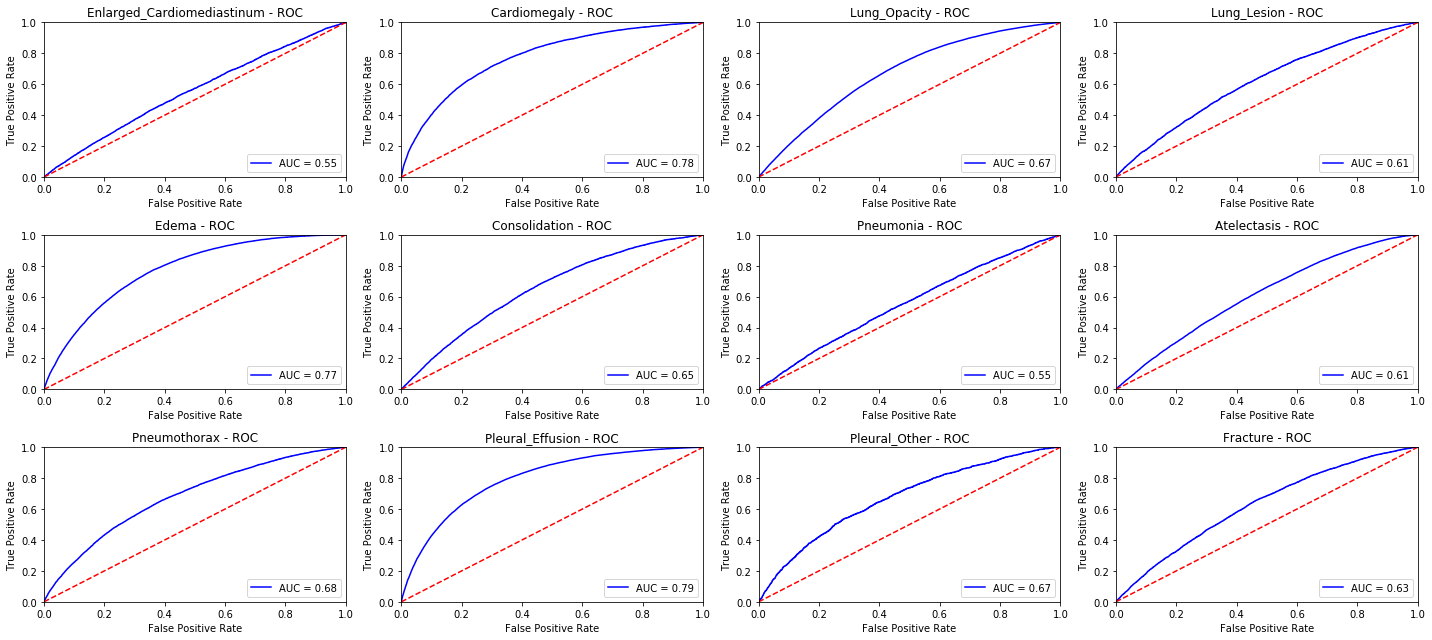

***** Precision / Recall *****


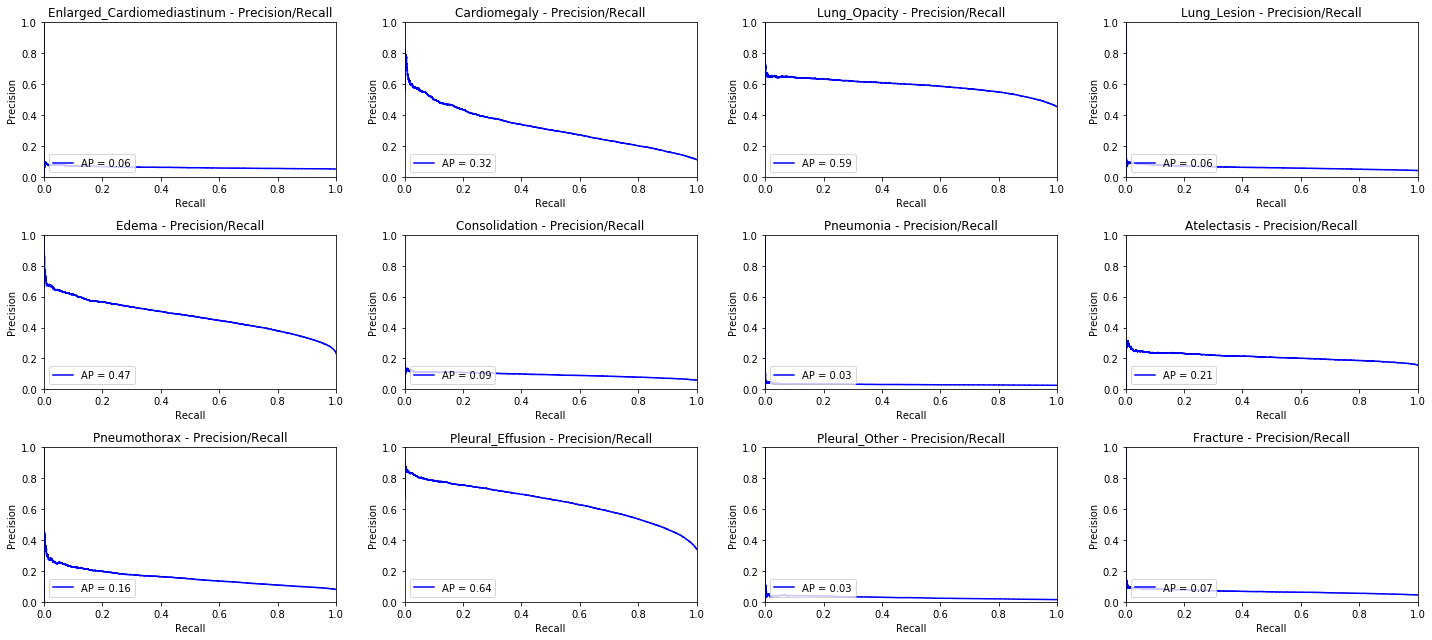


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.242225
Hamming Loss,0.117104
Hamming Accuracy,0.882896
Combined Recall,0.267321
Combined Precision,0.319786
Combined F1,0.274188


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,1346,0,0.000000,0.000000,0.000000,0.605236,0.074565
1,Cardiomegaly,3008,296,0.066157,0.672297,0.120460,0.808992,0.391436
2,Lung_Opacity,11984,13117,0.653872,0.597393,0.624358,0.688974,0.613682
3,Lung_Lesion,1137,0,0.000000,0.000000,0.000000,0.648774,0.074281
4,Edema,6015,1822,0.179052,0.591109,0.274850,0.790161,0.497324
5,Consolidation,1590,0,0.000000,0.000000,0.000000,0.663375,0.102866
6,Pneumonia,712,0,0.000000,0.000000,0.000000,0.617660,0.043203
7,Atelectasis,4075,0,0.000000,0.000000,0.000000,0.637620,0.222873
8,Pneumothorax,2134,6,0.001406,0.500000,0.002804,0.708667,0.190369
9,Pleural_Effusion,8854,9154,0.663768,0.642014,0.652710,0.821845,0.691991


***** ROC *****


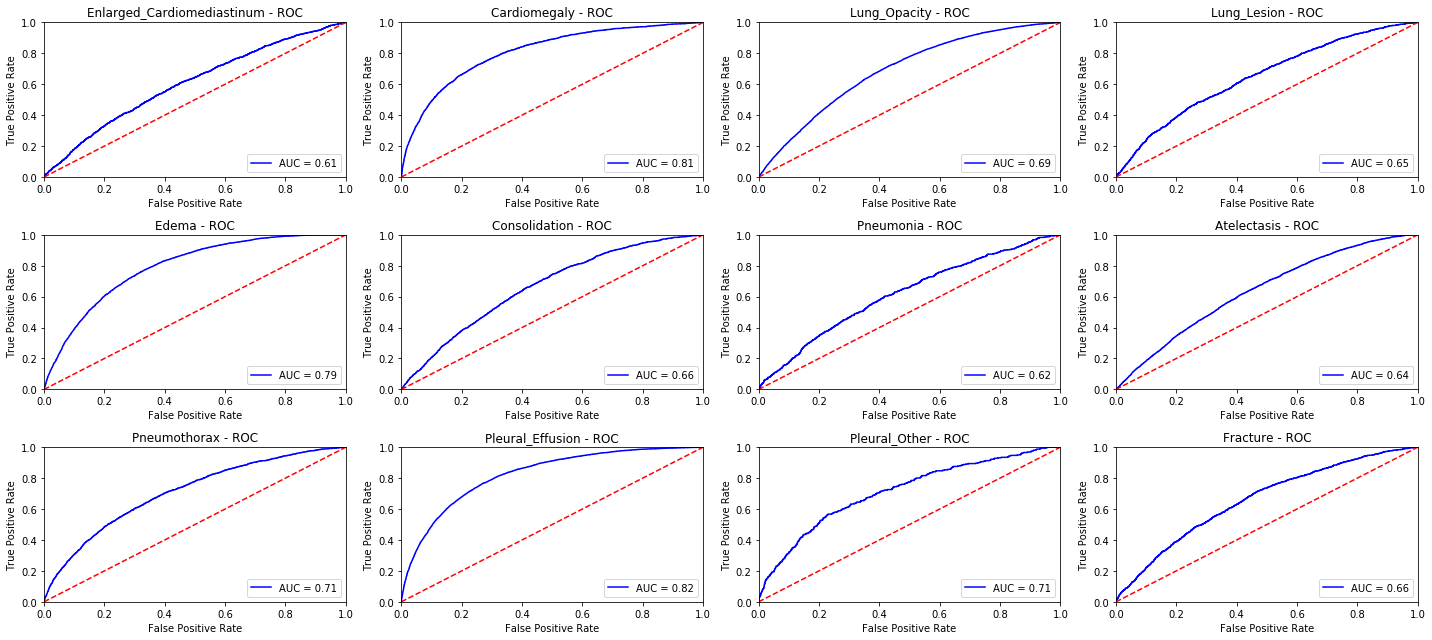

***** Precision / Recall *****


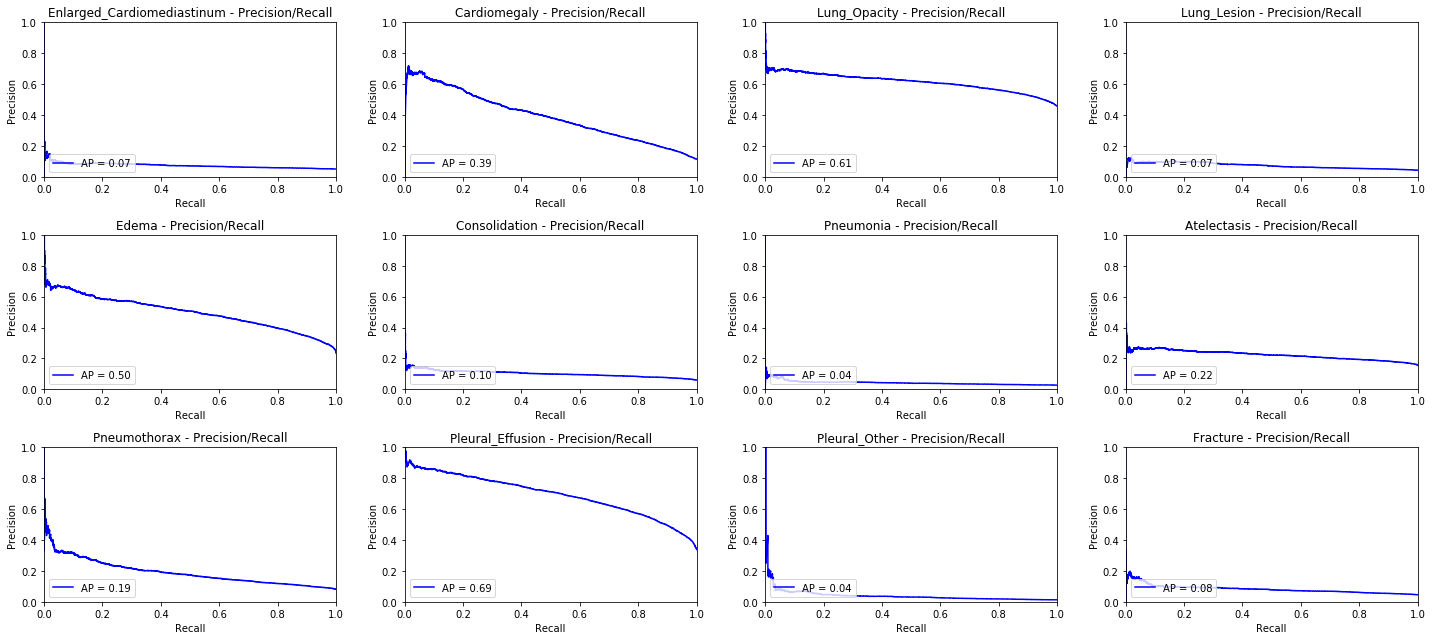

In [8]:
standardTraining.displayMetrics()


ACCURACY

▔▔▔▔


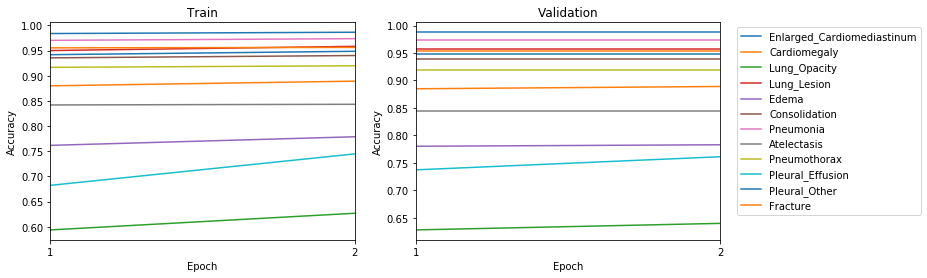


RECALL

▔▔▔


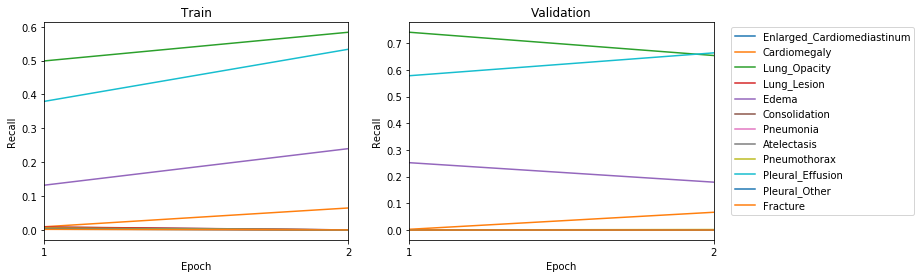


PRECISION

▔▔▔▔▔▔


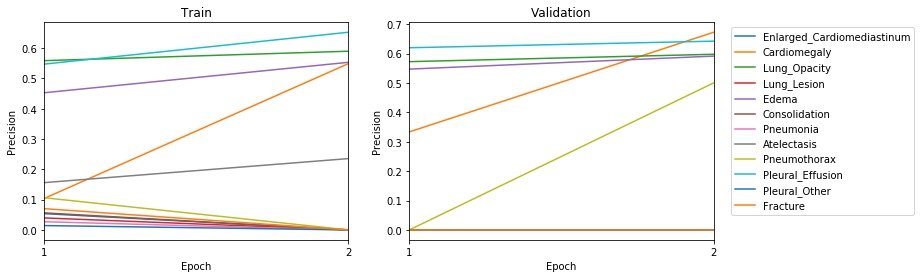


F1

▔


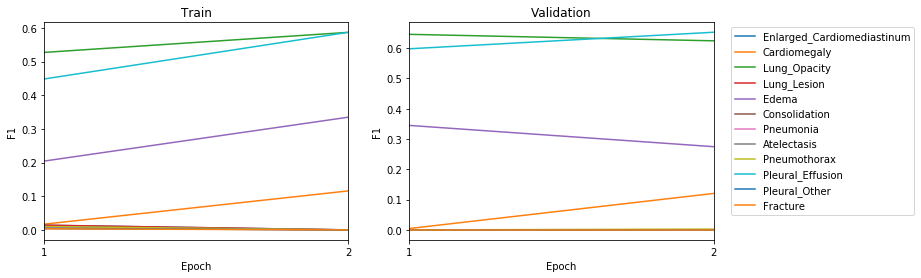


ROC AUC

▔▔▔▔


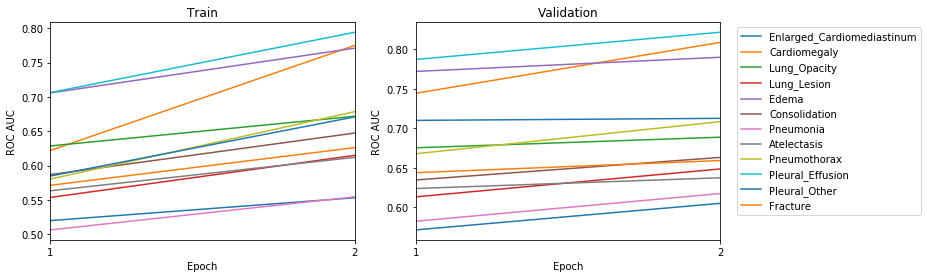


AVERAGE PRECISION

▔▔▔▔▔▔▔▔


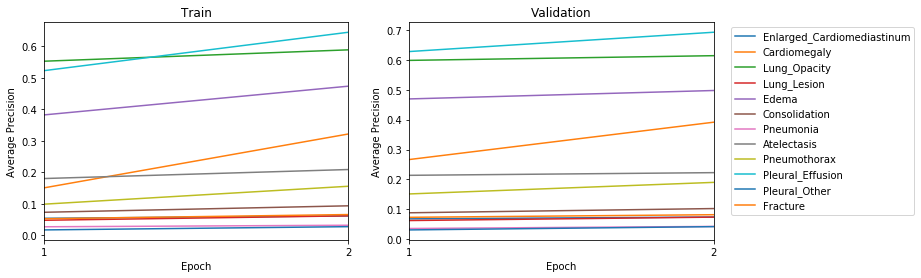

In [9]:
standardTraining.displayEpochProgression()

In [10]:
standardTraining.save()